Customer Churn Analysis

Problem Statement:
Customer churn is when a company’s customers stop doing business with that 
company. Businesses are very keen on measuring churn because keeping an 
existing customer is far less expensive than acquiring a new customer. New 
business involves working leads through a sales funnel, using marketing and 
sales budgets to gain additional customers. Existing customers will often have a 
higher volume of service consumption and can generate additional customer 
referrals.

Customer retention can be achieved with good customer service and products. 
But the most effective way for a company to prevent attrition of customers is to 
truly know them. The vast volumes of data collected about customers can be 
used to build churn prediction models. Knowing who is most likely to defect 
means that a company can prioritise focused marketing efforts on that subset of 
their customer base.
    
Preventing customer churn is critically important to the telecommunications 
sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of 
building and comparing several customer churn prediction models

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [82]:
data = pd.read_csv('Telecom_customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [83]:
## Know the shape of the data
data.shape

(7043, 21)

In [84]:
## Describe the data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [85]:
## It shows only three features as we are having only three numerical data filled columns

In [86]:
## Now let us first check the null values

In [87]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [88]:
## There are no null values hence we can convert the categorical data to numerical

In [89]:
## now we need to do mapping of each column 

In [90]:
gender_mapping = {'Male': 1, 'Female': 0}
data['gender'] = data['gender'].map(gender_mapping)

# Mapping for 'Partner' column (ordinal categories)
Partner_mapping = {'Yes': 1, 'No': 0}
data['Partner'] = data['Partner'].map(Partner_mapping)

# Mapping for 'Dependents' column (ordinal categories)
Dependents_mapping = {'Yes': 1, 'No': 0}
data['Dependents'] = data['Dependents'].map(Dependents_mapping)

# Mapping for 'PhoneService' column (binary labels)
PhoneService_mapping = {'Yes': 1, 'No': 0}
data['PhoneService'] = data['PhoneService'].map(PhoneService_mapping)

# Mapping for 'MultipleLines' column
MultipleLines_mapping = {'Yes':1, 'No':0, 'No phone service':2}
data['MultipleLines'] = data['MultipleLines'].map(MultipleLines_mapping)

# Mapping for 'InternetService' column (nominal categories to integers)
InternetService_mapping = {'Fiber optic': 0, 'DSL': 1, 'No': 2}
data['InternetService'] = data['InternetService'].map(InternetService_mapping)

# Mapping for 'OnlineSecurity' column
OnlineSecurity_mapping = {'Yes':1, 'No':0, 'No internet service':2}
data['OnlineSecurity'] = data['OnlineSecurity'].map(OnlineSecurity_mapping)

# Mapping for 'OnlineBackup' column
OnlineBackup_mapping = {'Yes':1, 'No':0, 'No internet service':2}
data['OnlineBackup'] = data['OnlineBackup'].map(OnlineBackup_mapping)

# Mapping for 'DeviceProtection' column
DeviceProtection_mapping = {'Yes':1, 'No':0, 'No internet service':2}
data['DeviceProtection'] = data['DeviceProtection'].map(DeviceProtection_mapping)

# Mapping for 'TechSupport' column
TechSupport_mapping = {'Yes':1, 'No':0, 'No internet service':2}
data['TechSupport'] = data['TechSupport'].map(TechSupport_mapping)

# Mapping for 'StreamingTV' column
StreamingTV_mapping = {'Yes':1, 'No':0, 'No internet service':2}
data['StreamingTV'] = data['StreamingTV'].map(StreamingTV_mapping)

# Mapping for 'StreamingMovies' column
StreamingMovies_mapping = {'Yes':1, 'No':0, 'No internet service':2}
data['StreamingMovies'] = data['StreamingMovies'].map(StreamingMovies_mapping)

# Mapping for 'Contract' column
Contract_mapping = {'Month-to-month':0, 'One year':1, 'Two year':2}
data['Contract'] = data['Contract'].map(Contract_mapping)

PaperlessBilling_mapping = {'Yes':1, 'No':0}
data['PaperlessBilling'] = data['PaperlessBilling'].map(PaperlessBilling_mapping)

PaymentMethod_mapping = {'Mailed check': 0, 'Electronic check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3}
data['PaymentMethod'] = data['PaymentMethod'].map(PaymentMethod_mapping)

Churn_mapping = {'Yes':0, 'No':1}
data['Churn'] = data['Churn'].map(Churn_mapping)

## View the transformed Dataset
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,1,29.85,29.85,1
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,0,56.95,1889.5,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,0,53.85,108.15,0
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,1
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,1,1,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,0,84.80,1990.5,1
7039,2234-XADUH,0,0,1,1,72,1,1,0,0,...,1,0,1,1,1,1,3,103.20,7362.9,1
7040,4801-JZAZL,0,0,1,1,11,0,2,1,1,...,0,0,0,0,0,1,1,29.60,346.45,1
7041,8361-LTMKD,1,1,1,0,4,1,1,0,0,...,0,0,0,0,0,1,0,74.40,306.6,0


In [91]:
## Again check for any null values in the dataset

In [92]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [93]:
## Great we have done perfect conversion

In [94]:
## Determine the data types of the columns 

In [95]:
print(data['MonthlyCharges'].dtype)
print(data['TotalCharges'].dtype)

float64
object


In [96]:
## In the below code we have replaced the '.' with space ''. 1 ensures only one dot is removed

In [97]:
data = data[data['TotalCharges'].str.replace('.', '', 1).str.isdigit()]

In [98]:
# Change the data type of the 'TotalCharges' column

In [99]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [100]:
data['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [101]:
## Now drop unnecessary columns

In [102]:
data = data.drop(columns=['customerID'])

In [103]:
data.shape

(7032, 20)

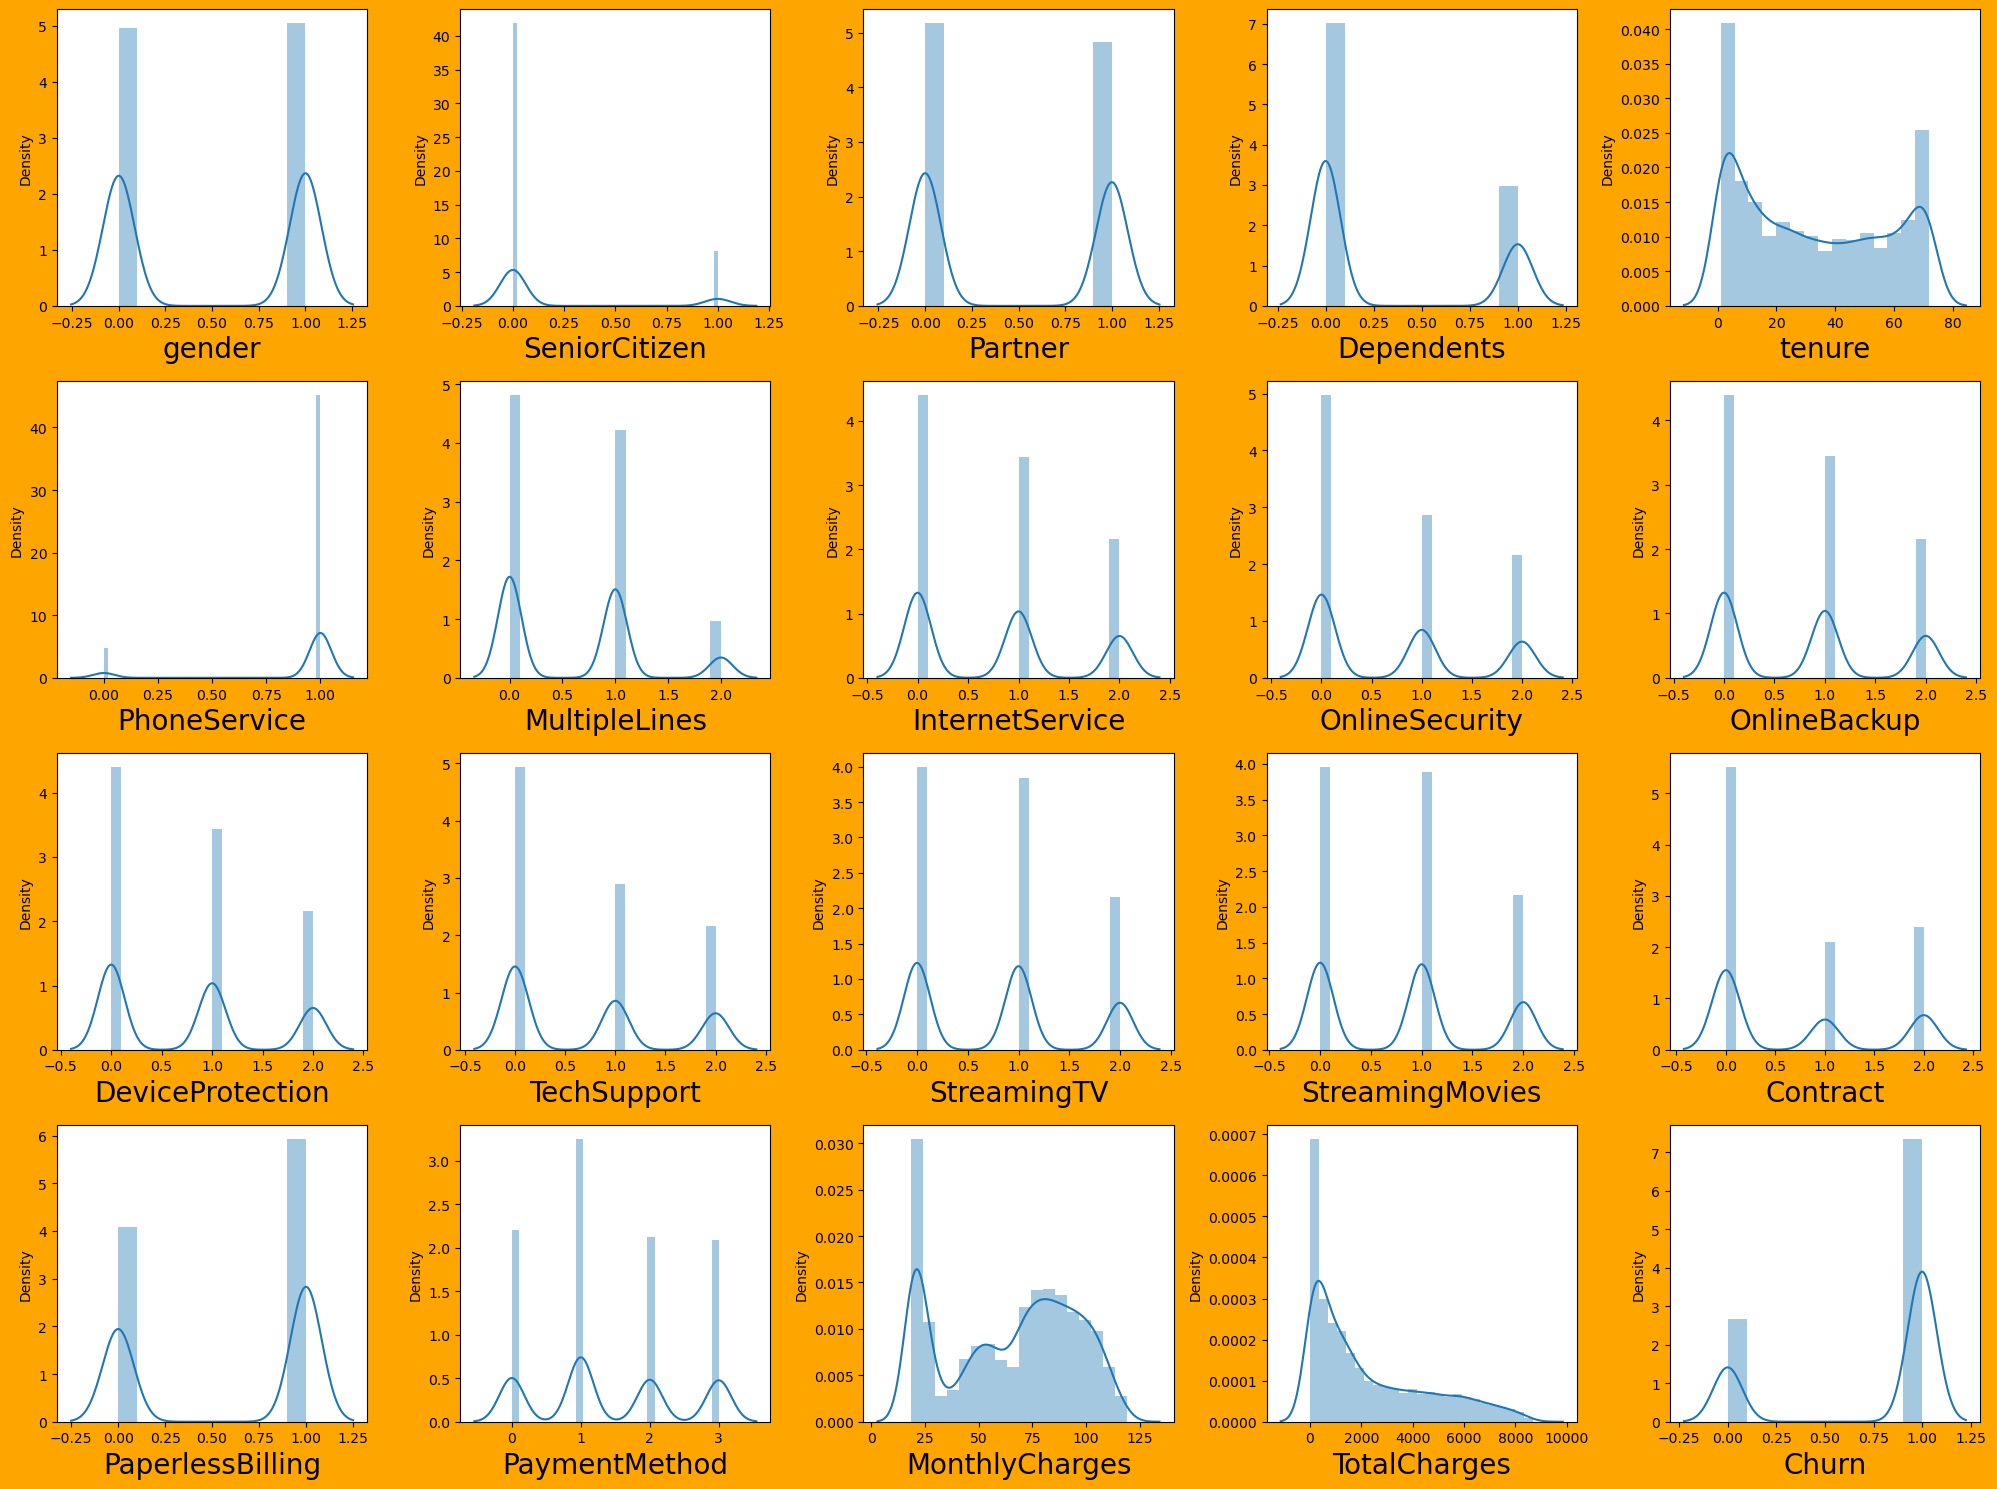

In [104]:
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)   ## Plots the graphs 4 rows and 5 columns at specified axis
        sns.distplot(data[column])    ## Plots a distribution plot of the data 
        plt.xlabel(column,fontsize=20)  
    plotnumber +=1     ## Increments or adds the graphs one by one
plt.tight_layout()

In [105]:
df_feature=data.drop('Churn',axis=1)

In [106]:
## Check how many outliers are there in the dataset

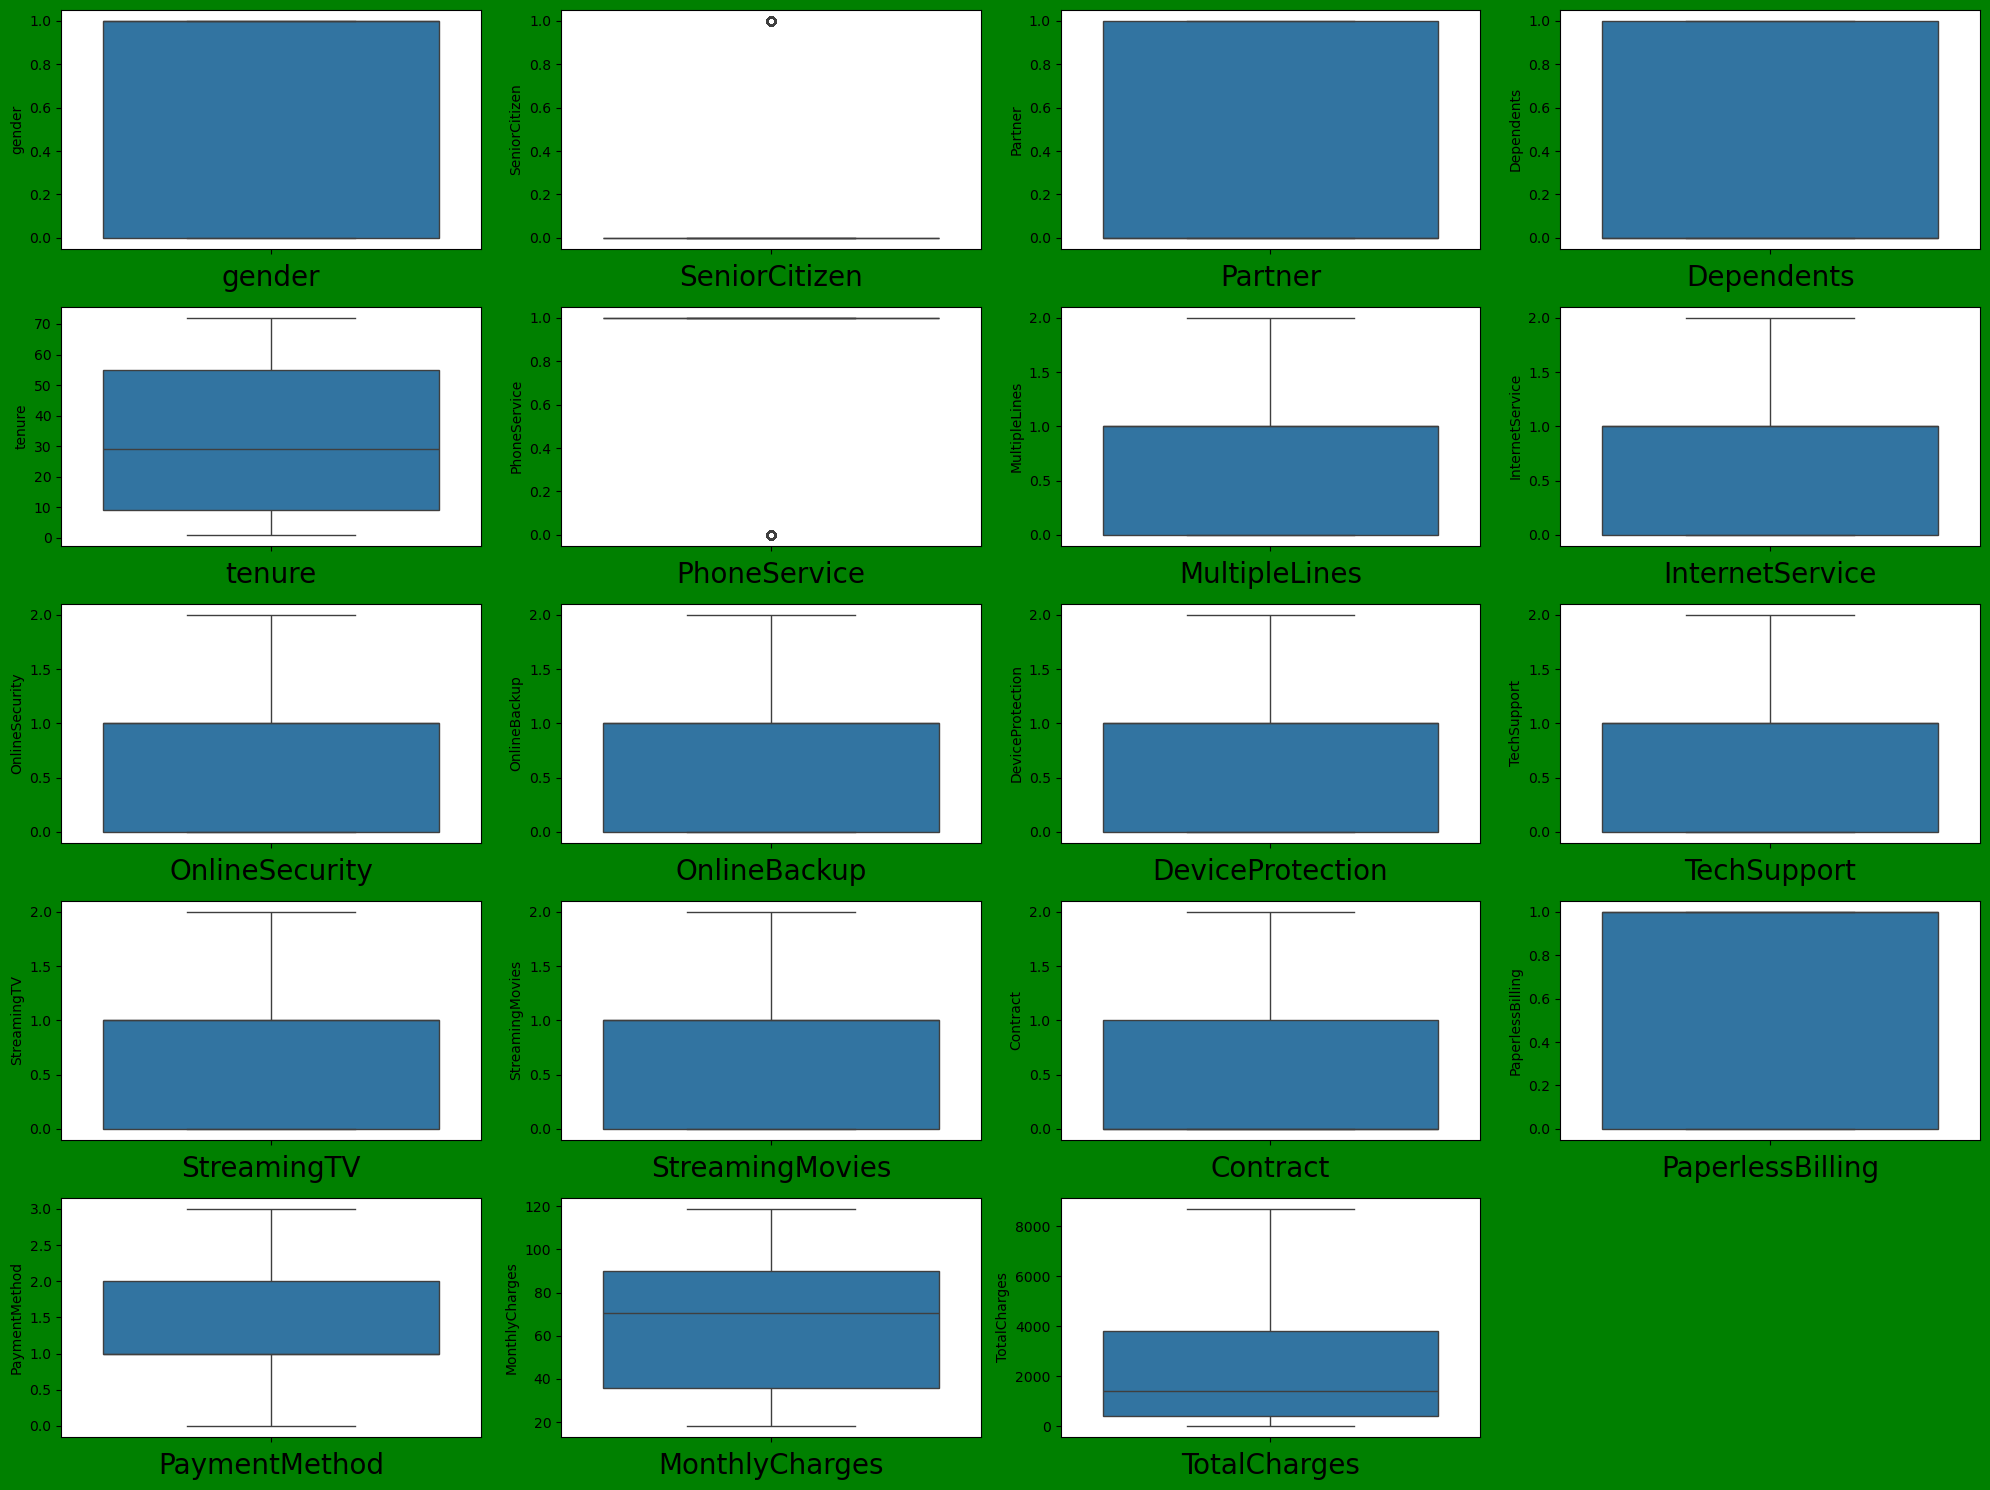

In [107]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in df_feature:
    if plotnumber <=20:
        plt.subplot(5,4,plotnumber)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [108]:
## As you can see there are no outliers. Hence we can proceed.

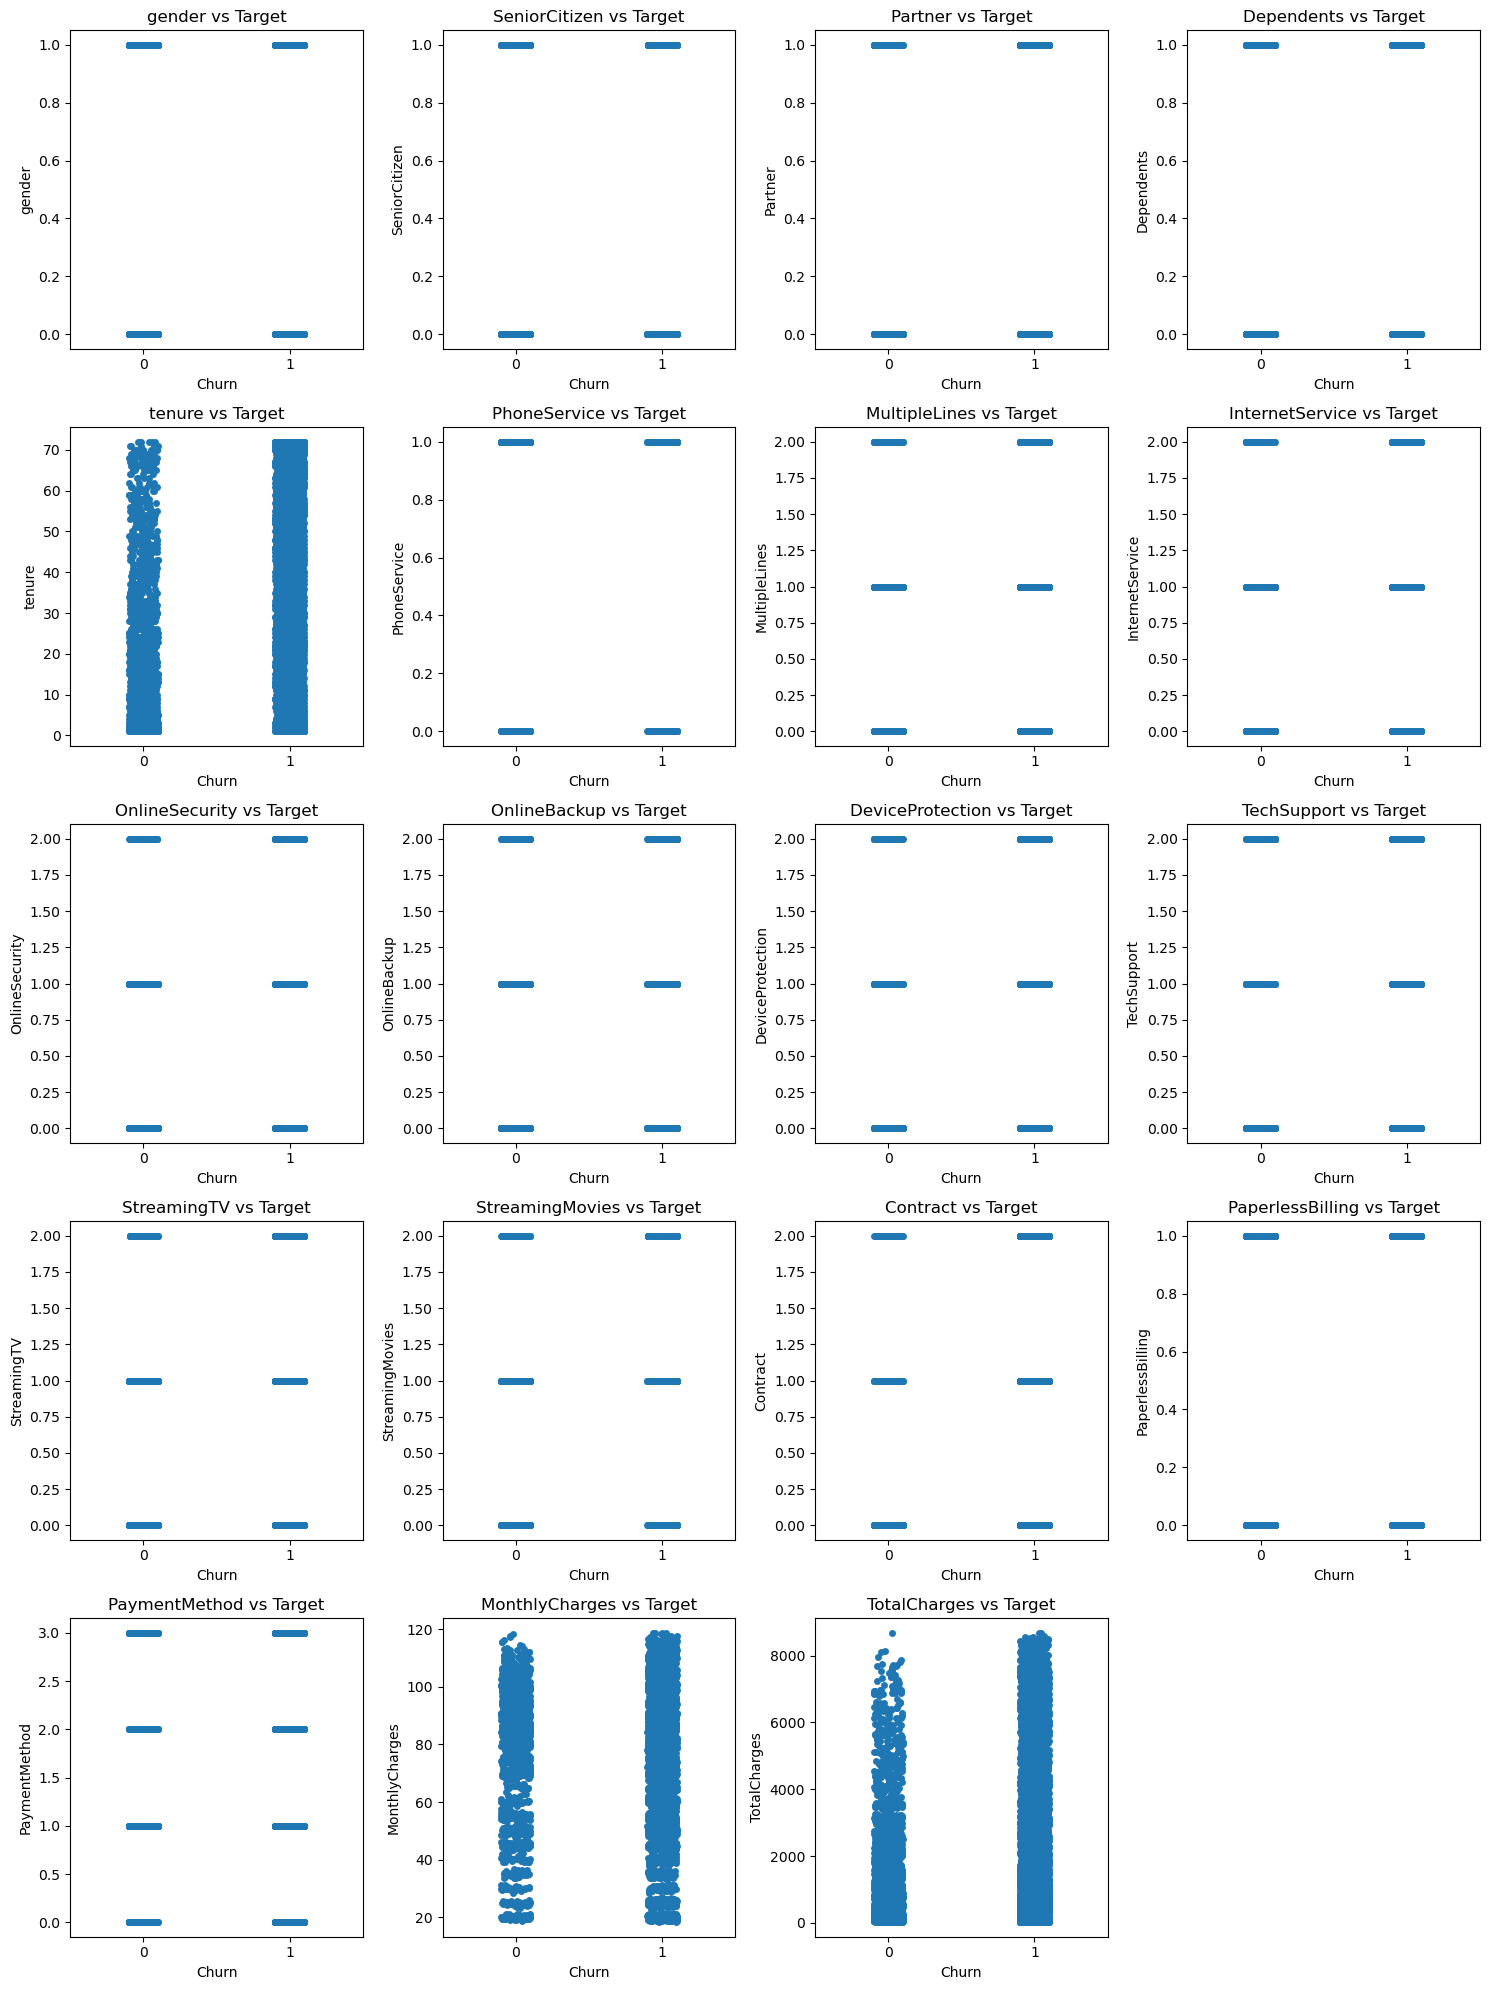

In [109]:
y=data['Churn']             ## Assigning y as labels
x=data.drop(columns=['Churn'])   ## By removing Label assigning remaning columns as features

plt.figure(figsize=(15,20))
plotnumber = 1
for column in x.columns:
    if plotnumber <= 20:
        ax = plt.subplot(5, 4, plotnumber)
        sns.stripplot(x=y, y=x[column], ax=ax)  # Swap x and y for correct orientation
        ax.set_title(f'{column} vs Target')
    plotnumber += 1
plt.tight_layout()
plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [112]:
x_scaled.shape

(7032, 19)

In [113]:
#Finding Variance inflation factor is each scaled column i.e x_scaled.shape[1] (1/(1=R2))

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns

In [116]:
vif

,vif,Features
0,1.001614,gender
1,1.149541,SeniorCitizen
2,1.460629,Partner
3,1.379727,Dependents
4,7.449251,tenure
5,3.193015,PhoneService
6,2.661895,MultipleLines
7,14.037801,InternetService
8,3.993249,OnlineSecurity
9,3.345493,OnlineBackup


In [117]:
## As you can see we have multicollinearity problem in tenure, Internet serivice, MonthlyCharges, TotalCharges

In [118]:
from sklearn.decomposition import PCA
## PCA stands for 'Principal Component Analysis where it helps to reduce dimensionality, correlation, noise.

pca = PCA(n_components=2)  # Number of components to keep
x_pca = pca.fit_transform(x)

In [119]:
def calculate_vif(x):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])] ## Compute vif over i-th feture and iterate over all features in a dataset
    return vif_data

while True:
    vif = calculate_vif(x)  ## Compute the vif for all feature
    max_vif = vif["VIF"].max()
    if max_vif > 5:  ## Set your threshold
        feature_to_drop = vif.loc[vif["VIF"].idxmax(), "Feature"]  ## Identifying feature with highest vif value
        x = x.drop(columns=[feature_to_drop]) ## Then finally drop the feature with higher vif
    else:
        break

In [120]:
vif

,Feature,VIF
0,gender,1.781798
1,SeniorCitizen,1.316044
2,Partner,2.750204
3,Dependents,1.934825
4,MultipleLines,1.940340
5,OnlineSecurity,4.148424
6,StreamingTV,4.138827
7,Contract,3.131286
8,PaperlessBilling,2.283319
9,PaymentMethod,2.838156


## Logistic Regression Model

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [122]:
log_reg=LogisticRegression()

In [123]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [125]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [126]:
## Training Score
log_reg.score(x_train,y_train)

0.8024270003792188

In [127]:
## Testing score

In [128]:
log_reg.score(x_test, y_test)

0.8077360637087599

In [129]:
confusion_matrix(y_test,y_pred)

array([[ 239,  219],
       [ 119, 1181]], dtype=int64)

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.52      0.59       458
           1       0.84      0.91      0.87      1300

    accuracy                           0.81      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



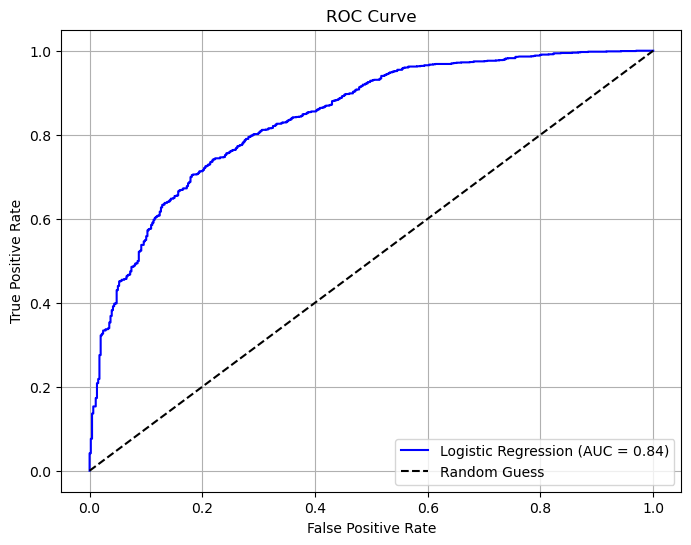

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = log_reg.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## K-Fold Cross Validation

In [132]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# Step 1: Preprocessing
# Separate features and target
x = data.drop('Churn', axis=1)
y = data['Churn']

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Encode categorical variables
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Encode target (Loan_Status)
x = pd.get_dummies(x)  # One-hot encoding for categorical features

# Step 2: Logistic Regression Model
model = LogisticRegression(max_iter=1000)

# Step 3: K-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy for each fold
cv_results = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

# Print the results
print(f"Cross-Validation Accuracy for each fold: {cv_results}")
print(f"Mean Accuracy: {cv_results.mean():.2f}")
print(f"Standard Deviation of Accuracy: {cv_results.std():.2f}")

Cross-Validation Accuracy for each fold: [0.78678038 0.81876333 0.79374111 0.79871977 0.8200569 ]
Mean Accuracy: 0.80
Standard Deviation of Accuracy: 0.01


## Hyperparameter Tuning

In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)  # Increase iterations for better convergence

# Optimized Hyperparameter Grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Remove 'elasticnet' and None
    'C': [0.1, 1, 10],  # Reduce values for faster tuning
    'solver': ['liblinear']  # Only use solvers that work with l1/l2
}

# Grid Search with CV=3 to reduce computation
grid_search1 = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search1.fit(x_train, y_train)

# Best hyperparameters and model performance
print("Best Hyperparameters:", grid_search1.best_params_)
print("Best Cross-Validation Accuracy:", grid_search1.best_score_)

# Evaluate on Test Data
best_model = grid_search1.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8078222222222222
Test Accuracy: 0.79


## Decision Tree Classifier

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
model = DecisionTreeClassifier()

In [136]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [137]:
## Training Score
model.score(x_train,y_train)

0.9976888888888888

In [138]:
## Testing Score
model.score(x_test,y_test)

0.7228144989339019

In [139]:
confusion_matrix(y_test,y_pred)

array([[188, 186],
       [113, 920]], dtype=int64)

In [140]:
##Print Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56       374
           1       0.83      0.89      0.86      1033

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



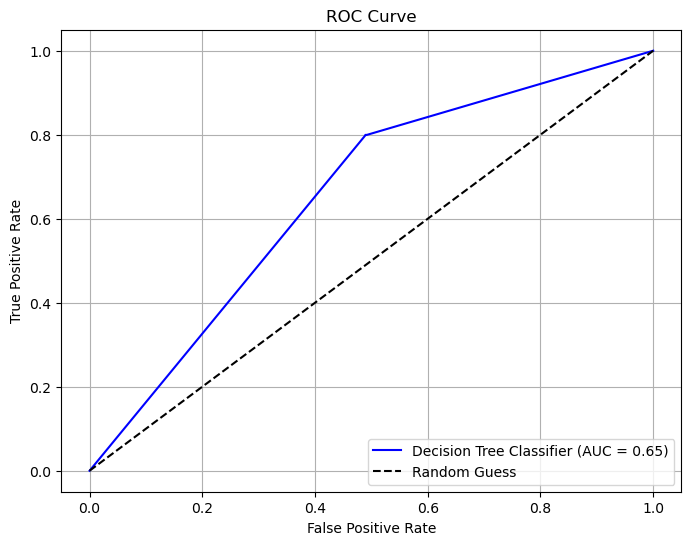

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree Classifier (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## KFold cross validation

In [142]:
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


# Preprocessing
# and other categorical features need encoding.
label_encoder = LabelEncoder()

# Encode target variable
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Encode categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Separate features and target
x = data.drop('Churn', axis=1)
y = data['Churn']

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Initialize KFold Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

# Print results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.7228145  0.74911158 0.71763869 0.75035562 0.72261735]
Mean Accuracy: 0.7325075496324515
Standard Deviation of Accuracy: 0.014192263423857527


## Hyperparameter Tuning

In [143]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


# Preprocessing
label_encoder = LabelEncoder()

# Encode target variable
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Encode categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Separate features and target
x = data.drop('Churn', axis=1)
y = data['Churn']

# Initialize the base model
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Splitting criteria
    'max_depth': [3, 5, 10, None],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10],           # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2'],      # Number of features to consider for best split
}

# Set up GridSearchCV
grid_search2 = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the metric
    cv=5,                # 5-fold cross-validation
    verbose=1,           # Show progress
    n_jobs=-1            # Use all processors
)

# Perform the grid search
grid_search2.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search2.best_params_)
print("Best Accuracy:", grid_search2.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Accuracy: 0.7898666666666667


## Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
model2 = RandomForestClassifier()

In [146]:
model2.fit(x_train,y_train)

RandomForestClassifier()

In [147]:
model2.score(x_train, y_train)

0.9976888888888888

In [148]:
model2.score(x_test,y_test)

0.7867803837953091

In [149]:
confusion_matrix(y_test,y_pred)

array([[188, 186],
       [113, 920]], dtype=int64)

In [150]:
##Print Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56       374
           1       0.83      0.89      0.86      1033

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



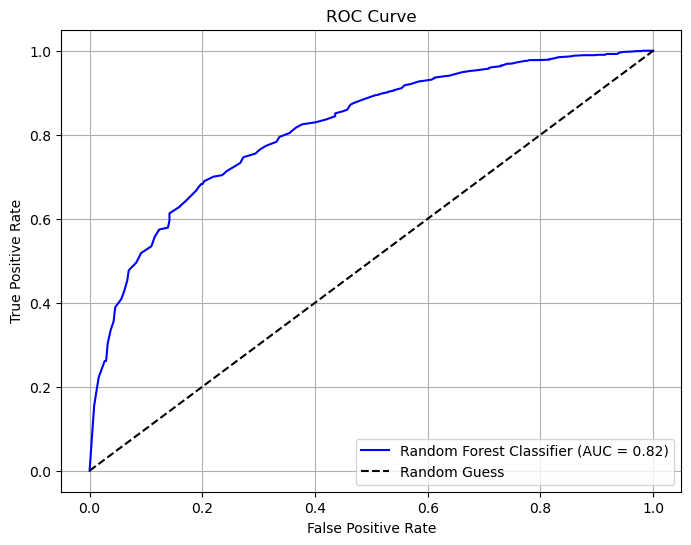

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = model2.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest Classifier (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## K-fold Cross Validation

In [152]:
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder


# Preprocessing
label_encoder = LabelEncoder()

# Encode target variable
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Encode categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Separate features and target
x = data.drop('Churn', axis=1)
y = data['Churn']

# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Initialize KFold Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(rf_clf, x, y, cv=kf, scoring='accuracy')

# Print results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.78962331 0.7981521  0.76529161 0.79231863 0.79943101]
Mean Accuracy: 0.7889633320898051
Standard Deviation of Accuracy: 0.01237780151274594


## Hyperparameter Tuning

In [153]:
from sklearn.model_selection import GridSearchCV


# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],             # Number of trees
    'max_depth': [None, 20],            # Tree depth
    'min_samples_split': [2, 5],            # Minimum samples to split
    'min_samples_leaf': [1, 2],              # Minimum samples at leaf
    'max_features': ['sqrt', 'log2'],     # Features to consider for split
    'bootstrap': [True],                 # Use bootstrapping
}

# Set up GridSearchCV
grid_search3 = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the metric
    cv=5,                # 5-fold cross-validation
    verbose=2,           # Show progress
    n_jobs=-1            # Use all processors
)

# Perform the grid search
grid_search3.fit(x_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search3.best_params_)
print("Best Accuracy:", grid_search3.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.8028444444444445


### Hence according to the accuracy scores evaluated Logistic Regression model is the best fit for this problem statement

In [154]:
import pickle

with open('grid_search3.pkl', 'wb') as file:
    pickle.dump(grid_search3, file)

print("Model saved successfully.")

Model saved successfully.
